## Compare Resistant vs Susceptible MCAV Corals 

#### Installation

In [117]:
install.packages("remotes")
remotes::install_github("vegandevs/vegan")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'vegan' from a github remote, the SHA1 (003391b9) has not changed since last install.
  Use `force = TRUE` to force installation



In [14]:
# Get the current working directory
current_directory <- getwd()
print(paste("Current Working Directory:", current_directory))

[1] "Current Working Directory: /project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/CBC_metagenomics/mcav1"


In [1]:
# Set a new working directory
new_directory <- "//project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav_taxonomy/kraken"
setwd(new_directory)

# Check if the working directory has been changed
current_directory <- getwd()
print(paste("New Working Directory:", current_directory))


[1] "New Working Directory: /project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav_taxonomy/kraken"


In [40]:
install.packages('ecodist')

also installing the dependency ‘igraph’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
install.packages('tidyverse')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
install.packages('ggvegan')

Warning message:
“package ‘ggvegan’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [6]:
install.packages('phyloseq')

Warning message:
“package ‘phyloseq’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [8]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("phyloseq")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'phyloseq'

also installing the dependencies ‘bitops’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘pixmap’, ‘sp’, ‘Rcpp’, ‘RcppArmadillo’, ‘rhdf5’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘GenomeInfoDb’, ‘codetools’, ‘iterators’, ‘survival’, ‘ade4’, ‘ape’, ‘Biobase’, ‘BiocGenerics’, ‘biomformat’, ‘Biostrings’, ‘foreach’, ‘igraph’, ‘multtest’, ‘plyr’, ‘reshape2’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'curl'



#### Begin Coding

In [22]:
library(tidyverse)
library(vegan)
library(phyloseq)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-5



In [23]:
#all = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/taxonomy/kraken/df_reads.csv',header=TRUE)

In [24]:
#all

# reading in otu and taxa table separately now 

In [25]:
#taxa=cbind(all$otuid, all$genus)

In [26]:
#dim(taxa)

In [27]:
#taxa=taxa[!duplicated(taxa), ]

In [28]:
#dim(taxa)
#head(taxa)

In [29]:
# Load otu and taxa table separately 

In [73]:
taxa = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/taxonomy/kraken/genus_table.csv',header=TRUE)
head(taxa)
dim(taxa)

,X4,X5
,<int>,<chr>
1,27370,Prosorhynchoides
2,12897,Fauvelopsis
3,12898,Hrabeiella
4,13381,Rotaria
5,13195,Limnognathia
6,13462,Dicyema


[1] 9740    2

In [74]:
# change taxa table names
colnames(taxa) <- c("otuid", "genus")

In [75]:
taxa_filter=taxa[!duplicated(taxa$genus), ]

In [76]:
dim(taxa_filter)

[1] 9381    2

In [77]:
head(taxa_filter)

,otuid,genus
,<int>,<chr>
1,27370,Prosorhynchoides
2,12897,Fauvelopsis
3,12898,Hrabeiella
4,13381,Rotaria
5,13195,Limnognathia
6,13462,Dicyema


In [78]:
row.names(taxa_filter) <- taxa_filter$otuid
taxa_filter$otuid <- NULL
head(taxa_filter)

,genus
,<chr>
27370,Prosorhynchoides
12897,Fauvelopsis
12898,Hrabeiella
13381,Rotaria
13195,Limnognathia
13462,Dicyema


In [35]:
otu = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/taxonomy/kraken/otu_sort.csv',header=TRUE)
head(otu)

,otu,T3_48_2022,T3_9_2019,T2_10_2022,T3_14_2019,T1_12_2022,T1_20_2019,T3_51_2022,T3_1_2019,T3_40_2022,⋯,T1_40_2022,T3_13_2022,T1_24_2019,T1_13_2022,T3_19_2022,T1_70_2022,T3_15_2019,T1_57_2022,T3_49_2022,T3_8_2019
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Populus,316.5870,341.64216,181.769831,716.23354,579.425660,235.65553,313.97855,765.31414,553.54680,⋯,379.4651,192.34104,416.12112,23.201738,299.28870,523.8925,741.35732,430.2618,516.0671,499.18059
2,Blastomyces,296.0624,395.18464,63.907747,260.50472,220.416514,44.55008,227.96738,301.55395,97.54340,⋯,268.2615,299.83785,186.23170,4.805094,192.68426,399.0974,85.11880,1013.7375,420.8576,149.98757
3,Pseudomonas,118.6858,123.69684,168.452857,142.09349,157.126565,51.34586,83.47134,228.92839,127.06041,⋯,140.7206,110.79173,116.35191,70.634878,104.95698,149.2325,175.11134,200.6470,111.6155,106.94766
4,Citrus,305.5353,78.04845,21.897499,97.40611,10.571206,35.42041,52.99332,65.62385,77.29336,⋯,220.0046,26.08479,50.72806,16.955116,213.07158,212.5224,17.16105,216.7784,295.3073,151.63503
5,Blastocystis,119.3036,152.59605,30.821244,88.96288,71.389964,23.27038,86.42304,158.77403,58.34757,⋯,116.6951,89.03152,80.72557,1.166951,68.23233,141.8876,34.18481,399.4406,116.3519,86.14847
6,Craterocolla,265.5158,57.31790,7.001708,78.66625,7.962727,19.97546,48.39416,51.89501,69.26199,⋯,195.7046,22.92716,39.81363,0.000000,199.54868,201.0589,11.87545,213.0716,272.1056,73.99844


In [36]:
#otu=cbind(all$sample_id, all$otuid, all$abundance_normal)
#colnames(otu)=c("Sample", "OTUID", "count")

In [37]:
#otu_table=pivot_wider(otu, names_from = Sample, values_from = count)

In [38]:
head(otu)

,otu,T3_48_2022,T3_9_2019,T2_10_2022,T3_14_2019,T1_12_2022,T1_20_2019,T3_51_2022,T3_1_2019,T3_40_2022,⋯,T1_40_2022,T3_13_2022,T1_24_2019,T1_13_2022,T3_19_2022,T1_70_2022,T3_15_2019,T1_57_2022,T3_49_2022,T3_8_2019
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Populus,316.5870,341.64216,181.769831,716.23354,579.425660,235.65553,313.97855,765.31414,553.54680,⋯,379.4651,192.34104,416.12112,23.201738,299.28870,523.8925,741.35732,430.2618,516.0671,499.18059
2,Blastomyces,296.0624,395.18464,63.907747,260.50472,220.416514,44.55008,227.96738,301.55395,97.54340,⋯,268.2615,299.83785,186.23170,4.805094,192.68426,399.0974,85.11880,1013.7375,420.8576,149.98757
3,Pseudomonas,118.6858,123.69684,168.452857,142.09349,157.126565,51.34586,83.47134,228.92839,127.06041,⋯,140.7206,110.79173,116.35191,70.634878,104.95698,149.2325,175.11134,200.6470,111.6155,106.94766
4,Citrus,305.5353,78.04845,21.897499,97.40611,10.571206,35.42041,52.99332,65.62385,77.29336,⋯,220.0046,26.08479,50.72806,16.955116,213.07158,212.5224,17.16105,216.7784,295.3073,151.63503
5,Blastocystis,119.3036,152.59605,30.821244,88.96288,71.389964,23.27038,86.42304,158.77403,58.34757,⋯,116.6951,89.03152,80.72557,1.166951,68.23233,141.8876,34.18481,399.4406,116.3519,86.14847
6,Craterocolla,265.5158,57.31790,7.001708,78.66625,7.962727,19.97546,48.39416,51.89501,69.26199,⋯,195.7046,22.92716,39.81363,0.000000,199.54868,201.0589,11.87545,213.0716,272.1056,73.99844


In [39]:
otu_table=as.data.frame(otu)
head(otu_table)

,otu,T3_48_2022,T3_9_2019,T2_10_2022,T3_14_2019,T1_12_2022,T1_20_2019,T3_51_2022,T3_1_2019,T3_40_2022,⋯,T1_40_2022,T3_13_2022,T1_24_2019,T1_13_2022,T3_19_2022,T1_70_2022,T3_15_2019,T1_57_2022,T3_49_2022,T3_8_2019
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Populus,316.5870,341.64216,181.769831,716.23354,579.425660,235.65553,313.97855,765.31414,553.54680,⋯,379.4651,192.34104,416.12112,23.201738,299.28870,523.8925,741.35732,430.2618,516.0671,499.18059
2,Blastomyces,296.0624,395.18464,63.907747,260.50472,220.416514,44.55008,227.96738,301.55395,97.54340,⋯,268.2615,299.83785,186.23170,4.805094,192.68426,399.0974,85.11880,1013.7375,420.8576,149.98757
3,Pseudomonas,118.6858,123.69684,168.452857,142.09349,157.126565,51.34586,83.47134,228.92839,127.06041,⋯,140.7206,110.79173,116.35191,70.634878,104.95698,149.2325,175.11134,200.6470,111.6155,106.94766
4,Citrus,305.5353,78.04845,21.897499,97.40611,10.571206,35.42041,52.99332,65.62385,77.29336,⋯,220.0046,26.08479,50.72806,16.955116,213.07158,212.5224,17.16105,216.7784,295.3073,151.63503
5,Blastocystis,119.3036,152.59605,30.821244,88.96288,71.389964,23.27038,86.42304,158.77403,58.34757,⋯,116.6951,89.03152,80.72557,1.166951,68.23233,141.8876,34.18481,399.4406,116.3519,86.14847
6,Craterocolla,265.5158,57.31790,7.001708,78.66625,7.962727,19.97546,48.39416,51.89501,69.26199,⋯,195.7046,22.92716,39.81363,0.000000,199.54868,201.0589,11.87545,213.0716,272.1056,73.99844


In [ ]:
# Remove the first column (OTUID)
rownames(otu_table) <- otu_table$otu  # Set OTUID as row names

rownames(otu_table)
head(otu_table)
dim(otu_table)

In [41]:
otu_table$otu=NULL
head(otu_table)
tail(otu_table)

,T3_48_2022,T3_9_2019,T2_10_2022,T3_14_2019,T1_12_2022,T1_20_2019,T3_51_2022,T3_1_2019,T3_40_2022,T2_16_2019,⋯,T1_40_2022,T3_13_2022,T1_24_2019,T1_13_2022,T3_19_2022,T1_70_2022,T3_15_2019,T1_57_2022,T3_49_2022,T3_8_2019
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Populus,316.5870,341.64216,181.769831,716.23354,579.425660,235.65553,313.97855,765.31414,553.54680,1371.44239,⋯,379.4651,192.34104,416.12112,23.201738,299.28870,523.8925,741.35732,430.2618,516.0671,499.18059
Blastomyces,296.0624,395.18464,63.907747,260.50472,220.416514,44.55008,227.96738,301.55395,97.54340,167.07997,⋯,268.2615,299.83785,186.23170,4.805094,192.68426,399.0974,85.11880,1013.7375,420.8576,149.98757
Pseudomonas,118.6858,123.69684,168.452857,142.09349,157.126565,51.34586,83.47134,228.92839,127.06041,396.48888,⋯,140.7206,110.79173,116.35191,70.634878,104.95698,149.2325,175.11134,200.6470,111.6155,106.94766
Citrus,305.5353,78.04845,21.897499,97.40611,10.571206,35.42041,52.99332,65.62385,77.29336,101.25019,⋯,220.0046,26.08479,50.72806,16.955116,213.07158,212.5224,17.16105,216.7784,295.3073,151.63503
Blastocystis,119.3036,152.59605,30.821244,88.96288,71.389964,23.27038,86.42304,158.77403,58.34757,73.10607,⋯,116.6951,89.03152,80.72557,1.166951,68.23233,141.8876,34.18481,399.4406,116.3519,86.14847
Craterocolla,265.5158,57.31790,7.001708,78.66625,7.962727,19.97546,48.39416,51.89501,69.26199,71.87047,⋯,195.7046,22.92716,39.81363,0.000000,199.54868,201.0589,11.87545,213.0716,272.1056,73.99844


,T3_48_2022,T3_9_2019,T2_10_2022,T3_14_2019,T1_12_2022,T1_20_2019,T3_51_2022,T3_1_2019,T3_40_2022,T2_16_2019,⋯,T1_40_2022,T3_13_2022,T1_24_2019,T1_13_2022,T3_19_2022,T1_70_2022,T3_15_2019,T1_57_2022,T3_49_2022,T3_8_2019
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dovyalis,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Klainedoxa,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Saccorhiza,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Tilopteris,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Phaeosiphoniella,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Prosorhynchoides,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [60]:
# Convert to matrix
otus=as.matrix(otu_table)
# Replace NAs with 0
#otus[is.na(otus)] <- 0

# Print the modified data frame
head(otus)
tail(otus)

,T3_48_2022,T3_9_2019,T2_10_2022,T3_14_2019,T1_12_2022,T1_20_2019,T3_51_2022,T3_1_2019,T3_40_2022,T2_16_2019,⋯,T1_40_2022,T3_13_2022,T1_24_2019,T1_13_2022,T3_19_2022,T1_70_2022,T3_15_2019,T1_57_2022,T3_49_2022,T3_8_2019
Populus,316.5870,341.64216,181.769831,716.23354,579.425660,235.65553,313.97855,765.31414,553.54680,1371.44239,⋯,379.4651,192.34104,416.12112,23.201738,299.28870,523.8925,741.35732,430.2618,516.0671,499.18059
Blastomyces,296.0624,395.18464,63.907747,260.50472,220.416514,44.55008,227.96738,301.55395,97.54340,167.07997,⋯,268.2615,299.83785,186.23170,4.805094,192.68426,399.0974,85.11880,1013.7375,420.8576,149.98757
Pseudomonas,118.6858,123.69684,168.452857,142.09349,157.126565,51.34586,83.47134,228.92839,127.06041,396.48888,⋯,140.7206,110.79173,116.35191,70.634878,104.95698,149.2325,175.11134,200.6470,111.6155,106.94766
Citrus,305.5353,78.04845,21.897499,97.40611,10.571206,35.42041,52.99332,65.62385,77.29336,101.25019,⋯,220.0046,26.08479,50.72806,16.955116,213.07158,212.5224,17.16105,216.7784,295.3073,151.63503
Blastocystis,119.3036,152.59605,30.821244,88.96288,71.389964,23.27038,86.42304,158.77403,58.34757,73.10607,⋯,116.6951,89.03152,80.72557,1.166951,68.23233,141.8876,34.18481,399.4406,116.3519,86.14847
Craterocolla,265.5158,57.31790,7.001708,78.66625,7.962727,19.97546,48.39416,51.89501,69.26199,71.87047,⋯,195.7046,22.92716,39.81363,0.000000,199.54868,201.0589,11.87545,213.0716,272.1056,73.99844


,T3_48_2022,T3_9_2019,T2_10_2022,T3_14_2019,T1_12_2022,T1_20_2019,T3_51_2022,T3_1_2019,T3_40_2022,T2_16_2019,⋯,T1_40_2022,T3_13_2022,T1_24_2019,T1_13_2022,T3_19_2022,T1_70_2022,T3_15_2019,T1_57_2022,T3_49_2022,T3_8_2019
Dovyalis,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Klainedoxa,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Saccorhiza,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Tilopteris,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Phaeosiphoniella,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Prosorhynchoides,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [43]:
meta = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_samples.csv',header=TRUE)

In [44]:
meta$Year=sub('.*(?=.{4}$)', '', meta$Month_year, perl=T)

In [45]:
meta$SeqID=paste0("T", meta$TransectNum, "_", meta$SampleNum, "_", meta$Year)

In [46]:
head(meta)

,Month_year,Country,Location,CollectionDate,Transect,TransectNum,OldTagNum,NewTagNum,SampleNum,Species,Sample_type,Health.status,Sampling_notes,Tubelabel_species,Sample_physical_location,Extraction_physical_location,Date_sequenced,Notes,Year,SeqID
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,122022,BEL,CBC,12/5/22,CURLEW,4,,77,2,OFAV,Core_EtOH,Healthy,,122022_BEL_CBC_T4_2_OFAV,UML_F1_R1_B5,UML_F1_R2_B3,,,2022,T4_2_2022
2,92023,BEL,CBC,9/25/23,CBC30N,1,,2,171,PAST,Core_RNAlater,Healthy,CLP 90%,92023_BEL_CBC_T1_171_PAST,UML_F1_R1_B10,,,,2023,T1_171_2023
3,92023,BEL,CBC,9/25/23,CBC30N,1,,21,172,PAST,Core_RNAlater,Healthy,No CL,92023_BEL_CBC_T1_172_PAST,UML_F1_R1_B10,,,,2023,T1_172_2023
4,92023,BEL,CBC,9/25/23,CBC30N,1,,3,173,SSID,Core_RNAlater,Healthy,CLP 80%; DC 20%,92023_BEL_CBC_T1_173_SSID,UML_F1_R1_B10,,,,2023,T1_173_2023
5,92023,BEL,CBC,9/25/23,CBC30N,1,,24,174,MCAV,Core_RNAlater,Healthy,CLP 10%,92023_BEL_CBC_T1_174_MCAV,UML_F1_R1_B10,,,,2023,T1_174_2023
6,92023,BEL,CBC,9/25/23,CBC30N,1,,13,175,PAST,Core_RNAlater,Healthy,No CL,92023_BEL_CBC_T1_175_PAST,UML_F1_R1_B10,,,,2023,T1_175_2023


In [47]:
colony=read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_ColonyData.csv',header=TRUE)

sample_colony=merge(meta, colony, by=c("TransectNum", "NewTagNum"))
sample_colony=sample_colony[!is.na(sample_colony$NewTagNum),]
sample_colony=sample_colony[sample_colony$Sample_type=="Core_EtOH",]
sample_colony[sample_colony$SeqID=="T1_14_2019",]

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


TransectNum,NewTagNum,Month_year,Country,Location,CollectionDate,Transect.x,OldTagNum,SampleNum,Species.x,⋯,Meter,Meters_90,Direction,Size_Class,Notes_June_2019,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>


In [48]:
# remove duplicates
sample_colony=sample_colony[!sample_colony$SeqID=="T4_3_2022",]
sample_colony=sample_colony[!sample_colony$SeqID=="T4_4_2022",]

In [49]:
rownames(sample_colony)=sample_colony$SeqID
sample_colony$RS=ifelse(sample_colony$Date_DocumentedDisease=="Healthy", "Resistant", "Susceptible")
head(sample_colony)

,TransectNum,NewTagNum,Month_year,Country,Location,CollectionDate,Transect.x,OldTagNum,SampleNum,Species.x,⋯,Meters_90,Direction,Size_Class,Notes_June_2019,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,RS
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
T1_3_2022,1,1,52022,BEL,CBC,5/21/22,CBC30N,349,3,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_148_2022,1,1,122022,BEL,CBC,12/2/22,CBC30N,,148,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_2_2019,1,1,62019,BEL,CBC,6/21/19,CBC30N,349,2,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_6_2022,1,1,52022,BEL,CBC,5/21/22,CBC30N,349,6,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_149_2022,1,1,122022,BEL,CBC,12/2/22,CBC30N,,149,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_36_2022,1,10,52022,BEL,CBC,5/21/22,CBC30N,385,36,SSID,⋯,2.8,right,4,,62,35,12/2/22,9/25/23,NA,Susceptible


In [51]:
dim(taxa_filter)

[1] 9381    1

In [52]:
dim(otus)

[1] 9368   21

In [54]:
head(otus)

,T3_48_2022,T3_9_2019,T2_10_2022,T3_14_2019,T1_12_2022,T1_20_2019,T3_51_2022,T3_1_2019,T3_40_2022,T2_16_2019,⋯,T1_40_2022,T3_13_2022,T1_24_2019,T1_13_2022,T3_19_2022,T1_70_2022,T3_15_2019,T1_57_2022,T3_49_2022,T3_8_2019
Populus,316.5870,341.64216,181.769831,716.23354,579.425660,235.65553,313.97855,765.31414,553.54680,1371.44239,⋯,379.4651,192.34104,416.12112,23.201738,299.28870,523.8925,741.35732,430.2618,516.0671,499.18059
Blastomyces,296.0624,395.18464,63.907747,260.50472,220.416514,44.55008,227.96738,301.55395,97.54340,167.07997,⋯,268.2615,299.83785,186.23170,4.805094,192.68426,399.0974,85.11880,1013.7375,420.8576,149.98757
Pseudomonas,118.6858,123.69684,168.452857,142.09349,157.126565,51.34586,83.47134,228.92839,127.06041,396.48888,⋯,140.7206,110.79173,116.35191,70.634878,104.95698,149.2325,175.11134,200.6470,111.6155,106.94766
Citrus,305.5353,78.04845,21.897499,97.40611,10.571206,35.42041,52.99332,65.62385,77.29336,101.25019,⋯,220.0046,26.08479,50.72806,16.955116,213.07158,212.5224,17.16105,216.7784,295.3073,151.63503
Blastocystis,119.3036,152.59605,30.821244,88.96288,71.389964,23.27038,86.42304,158.77403,58.34757,73.10607,⋯,116.6951,89.03152,80.72557,1.166951,68.23233,141.8876,34.18481,399.4406,116.3519,86.14847
Craterocolla,265.5158,57.31790,7.001708,78.66625,7.962727,19.97546,48.39416,51.89501,69.26199,71.87047,⋯,195.7046,22.92716,39.81363,0.000000,199.54868,201.0589,11.87545,213.0716,272.1056,73.99844


In [55]:
#new_rownames <- taxa[,1]
# Assign the values as row names to the matrix
#rownames(taxa) <- new_rownames
#head(taxa)

In [56]:
head(sample_colony)

,TransectNum,NewTagNum,Month_year,Country,Location,CollectionDate,Transect.x,OldTagNum,SampleNum,Species.x,⋯,Meters_90,Direction,Size_Class,Notes_June_2019,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,RS
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
T1_3_2022,1,1,52022,BEL,CBC,5/21/22,CBC30N,349,3,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_148_2022,1,1,122022,BEL,CBC,12/2/22,CBC30N,,148,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_2_2019,1,1,62019,BEL,CBC,6/21/19,CBC30N,349,2,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_6_2022,1,1,52022,BEL,CBC,5/21/22,CBC30N,349,6,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_149_2022,1,1,122022,BEL,CBC,12/2/22,CBC30N,,149,SSID,⋯,0.5,right,5,,45,24,5/21/22,Diseased,NA,Susceptible
T1_36_2022,1,10,52022,BEL,CBC,5/21/22,CBC30N,385,36,SSID,⋯,2.8,right,4,,62,35,12/2/22,9/25/23,NA,Susceptible


In [80]:
head(taxa_filter)

,genus
,<chr>
27370,Prosorhynchoides
12897,Fauvelopsis
12898,Hrabeiella
13381,Rotaria
13195,Limnognathia
13462,Dicyema


In [81]:
taxonomy=as.matrix(taxa_filter)

In [94]:
# Trying one more time to make taxa names as genuses not otuids
genuses = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/taxonomy/kraken/genus_table.csv',header=TRUE)
head(genuses)
dim(genuses)

,X4,X5
,<int>,<chr>
1,27370,Prosorhynchoides
2,12897,Fauvelopsis
3,12898,Hrabeiella
4,13381,Rotaria
5,13195,Limnognathia
6,13462,Dicyema


[1] 9740    2

In [105]:
colnames(genuses)=c("otuid","genus")
head(genuses)

,otuid,genus
,<int>,<chr>
1,27370,Prosorhynchoides
2,12897,Fauvelopsis
3,12898,Hrabeiella
4,13381,Rotaria
5,13195,Limnognathia
6,13462,Dicyema


In [109]:
# Assuming 'taxa' is your data frame
genus_2 <- genuses[!duplicated(genuses$genus), ]
dim(genus_2)
head(genus_2)

[1] 9381    2

,otuid,genus
,<int>,<chr>
1,27370,Prosorhynchoides
2,12897,Fauvelopsis
3,12898,Hrabeiella
4,13381,Rotaria
5,13195,Limnognathia
6,13462,Dicyema


In [111]:
row.names(genus_2) <- genus_2$genus

genus_2$otuid= NULL
head(genus_2)

,genus
,<chr>
Prosorhynchoides,Prosorhynchoides
Fauvelopsis,Fauvelopsis
Hrabeiella,Hrabeiella
Rotaria,Rotaria
Limnognathia,Limnognathia
Dicyema,Dicyema


In [112]:
genus_matrix=as.matrix(genus_2)

In [118]:
rownames(genus_matrix)

[1] "                      Prosorhynchoides"                        
   [2] "                  Fauvelopsis"                                 
   [3] "                  Hrabeiella"                                  
   [4] "                  Rotaria"                                     
   [5] "                Limnognathia"                                  
   [6] "                Dicyema"                                       
   [7] "                Dicyemennea"                                   
   [8] "            Trichoplax"                                        
   [9] "              Caullerya"                                       
  [10] "              Abeoforma"                                       
  [11] "              Freshwater Ichthyosporeans 2"                    
  [12] "              Marine Ichthyosporeans 1"                        
  [13] "              Pirum"                                           
  [14] "              Freshwater Ichthyosporeans 1"                    
  [15] "              Ichthyophonus"                                   
  [16] "              Amoebidium"                                      
  [17] "              Psorospermium"                                   
  [18] "              Paramoebidium"                                   
  [19] "              Anurofeca"                                       
  [20] "              Creolimax"                                       
  [21] "              LKM51"                                           
  [22] "              Pseudoperkinsus"                                 
  [23] "              Amphibiocystidium"                               
  [24] "              Amphibiothecum"                                  
  [25] "              Dermocystidium"                                  
  [26] "              Rhinosporidium"                                  
  [27] "              Codosiga"                                        
  [28] "              Desmarella"                                      
  [29] "              Monosiga"                                        
  [30] "              Proterospongia"                                  
  [31] "              Sphaeroeca"                                      
  [32] "              Freshwater Choanoflagellates 1"                  
  [33] "              Lagenoeca"                                       
  [34] "              Paramonosiga"                                    
  [35] "              Choanoeca"                                       
  [36] "              Freshwater Choanoflagellates 2"                  
  [37] "              Salpingoeca"                                     
  [38] "              Hartaetosiga"                                    
  [39] "              Stagondoeca"                                     
  [40] "              Acanthoeca"                                      
  [41] "              FV23-1A4"                                        
  [42] "              Polyoeca"                                        
  [43] "              Savillea"                                        
  [44] "              Pleurasiga"                                      
  [45] "              Diaphanoeca"                                     
  [46] "              Didymoeca"                                       
  [47] "              Marine Choanoflagellates 1"                      
  [48] "              Marine Choanoflagellates 2"                      
  [49] "              Stephanoeca"                                     
  [50] "              Bicosta"                                         
  [51] "              Calliacantha"                                    
  [52] "              Corallochytrium"                                 
  [53] "              AT4-11"                                          
  [54] "              Marine Group"                                    
  [55] "              Capsaspora"                                      
  [56] "              Ministeria"          

In [126]:
otus_sorted <- otus[1:100, ]
dim(otus_sorted)

[1] 100  21

In [127]:
OTU = otu_table((otus_sorted), taxa_are_rows = TRUE)
TAX = tax_table(genus_matrix)
SAMP=sample_data(sample_colony)

In [116]:
taxa_names(OTU)

[1] "Populus"                                           
   [2] "Blastomyces"                                       
   [3] "Pseudomonas"                                       
   [4] "Citrus"                                            
   [5] "Blastocystis"                                      
   [6] "Craterocolla"                                      
   [7] "Brassica"                                          
   [8] "Hordeum"                                           
   [9] "Aeromonas"                                         
  [10] "Symbiodinium"                                      
  [11] "Roseobacter clade NAC11-7 lineage"                 
  [12] "Microstroma"                                       
  [13] "Eucalyptus"                                        
  [14] "Thiomicrorhabdus"                                  
  [15] "Aphelidium"                                        
  [16] "Plasmodium"                                        
  [17] "Comamonas"                                         
  [18] "Gymnosporangium"                                   
  [19] "Stereopsis"                                        
  [20] "Stenotrophomonas"                                  
  [21] "Hevea"                                             
  [22] "Amphidinium"                                       
  [23] "Bacillus"                                          
  [24] "Cryptomonas"                                       
  [25] "Polarella"                                         
  [26] "Roseofilum AO1-A"                                  
  [27] "Acanthamoeba"                                      
  [28] "Clavulicium"                                       
  [29] "Streptococcus"                                     
  [30] "Cibicidoides"                                      
  [31] "Cryptobia"                                         
  [32] "Kurthia"                                           
  [33] "Diaphorobacter"                                    
  [34] "Chryseolinea"                                      
  [35] "Weissella"                                         
  [36] "Klebsiella"                                        
  [37] "Capsicum"                                          
  [38] "Candidatus Solibacter"                             
  [39] "Gossypium"                                         
  [40] "Myroides"                                          
  [41] "Candidatus Nitrocosmicus"                          
  [42] "Neogoniolithon"                                    
  [43] "Cohaesibacter"                                     
  [44] "Lysinibacillus"                                    
  [45] "Vibrio"                                            
  [46] "Candidatus Endomicrobium"                          
  [47] "Phaseolus"                                         
  [48] "Mycoplasma"                                        
  [49] "Escherichia-Shigella"                              
  [50] "Cutibacterium"                                     
  [51] "Desulfotomaculum"                                  
  [52] "Roseburia"                                         
  [53] "Staphylococcus"                                    
  [54] "Proteus"                                           
  [55] "Schroedera"                                        
  [56] "Sarcocystis"                                       
  [57] "Streptomyces"                                      
  [58] "Burkholderia-Caballeronia-Paraburkholderia"        
  [59] "Camellia"                                          
  [60] "Hildenbrandia"                                     
  [61] "Acanthostaurus"                                    
  [62] "Cibicides"                                         
  [63] "Nicotiana"                                         
  [64] "Conringia"                                         
  [65] "Punica"                                            
  [66] "Lotus"                                             
  [67] "Niorma"                            

In [115]:
taxa_names(TAX)

[1] "                      Prosorhynchoides"                        
   [2] "                  Fauvelopsis"                                 
   [3] "                  Hrabeiella"                                  
   [4] "                  Rotaria"                                     
   [5] "                Limnognathia"                                  
   [6] "                Dicyema"                                       
   [7] "                Dicyemennea"                                   
   [8] "            Trichoplax"                                        
   [9] "              Caullerya"                                       
  [10] "              Abeoforma"                                       
  [11] "              Freshwater Ichthyosporeans 2"                    
  [12] "              Marine Ichthyosporeans 1"                        
  [13] "              Pirum"                                           
  [14] "              Freshwater Ichthyosporeans 1"                    
  [15] "              Ichthyophonus"                                   
  [16] "              Amoebidium"                                      
  [17] "              Psorospermium"                                   
  [18] "              Paramoebidium"                                   
  [19] "              Anurofeca"                                       
  [20] "              Creolimax"                                       
  [21] "              LKM51"                                           
  [22] "              Pseudoperkinsus"                                 
  [23] "              Amphibiocystidium"                               
  [24] "              Amphibiothecum"                                  
  [25] "              Dermocystidium"                                  
  [26] "              Rhinosporidium"                                  
  [27] "              Codosiga"                                        
  [28] "              Desmarella"                                      
  [29] "              Monosiga"                                        
  [30] "              Proterospongia"                                  
  [31] "              Sphaeroeca"                                      
  [32] "              Freshwater Choanoflagellates 1"                  
  [33] "              Lagenoeca"                                       
  [34] "              Paramonosiga"                                    
  [35] "              Choanoeca"                                       
  [36] "              Freshwater Choanoflagellates 2"                  
  [37] "              Salpingoeca"                                     
  [38] "              Hartaetosiga"                                    
  [39] "              Stagondoeca"                                     
  [40] "              Acanthoeca"                                      
  [41] "              FV23-1A4"                                        
  [42] "              Polyoeca"                                        
  [43] "              Savillea"                                        
  [44] "              Pleurasiga"                                      
  [45] "              Diaphanoeca"                                     
  [46] "              Didymoeca"                                       
  [47] "              Marine Choanoflagellates 1"                      
  [48] "              Marine Choanoflagellates 2"                      
  [49] "              Stephanoeca"                                     
  [50] "              Bicosta"                                         
  [51] "              Calliacantha"                                    
  [52] "              Corallochytrium"                                 
  [53] "              AT4-11"                                          
  [54] "              Marine Group"                                    
  [55] "              Capsaspora"                                      
  [56] "              Ministeria"          

In [128]:
# Create phyloseq object
Corals = phyloseq(OTU, SAMP)
Corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 21 samples ]
sample_data() Sample Data:       [ 21 samples by 36 sample variables ]

In [ ]:
Corals.ord <- ordinate(Corals, "NMDS", "bray", trymax=1000)

In [142]:
options(repr.plot.width=20, repr.plot.height=15)

In [ ]:
plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="RS")+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [ ]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/RS_nMDS.pdf", width = 15, height=10)


In [ ]:
plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="Health.status")+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [ ]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/health_status_nMDS.pdf", width = 15, height=10)


In [ ]:
sample_variables(Corals)

In [ ]:
#install.packages('ggplot')
#if (!require("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")

#BiocManager::install("ggplot2")

In [ ]:
#install.packages('RColorBrewer')

In [123]:
library(RColorBrewer)
library(ggplot2)

In [ ]:
Corals

In [129]:
Corals_10 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:10]), Corals)

In [131]:
Corals_30 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:30]), Corals)

In [140]:
Corals_100 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:100]), Corals)

In [ ]:
colnames(TAX)= c("Genus","OTUID")
TAX

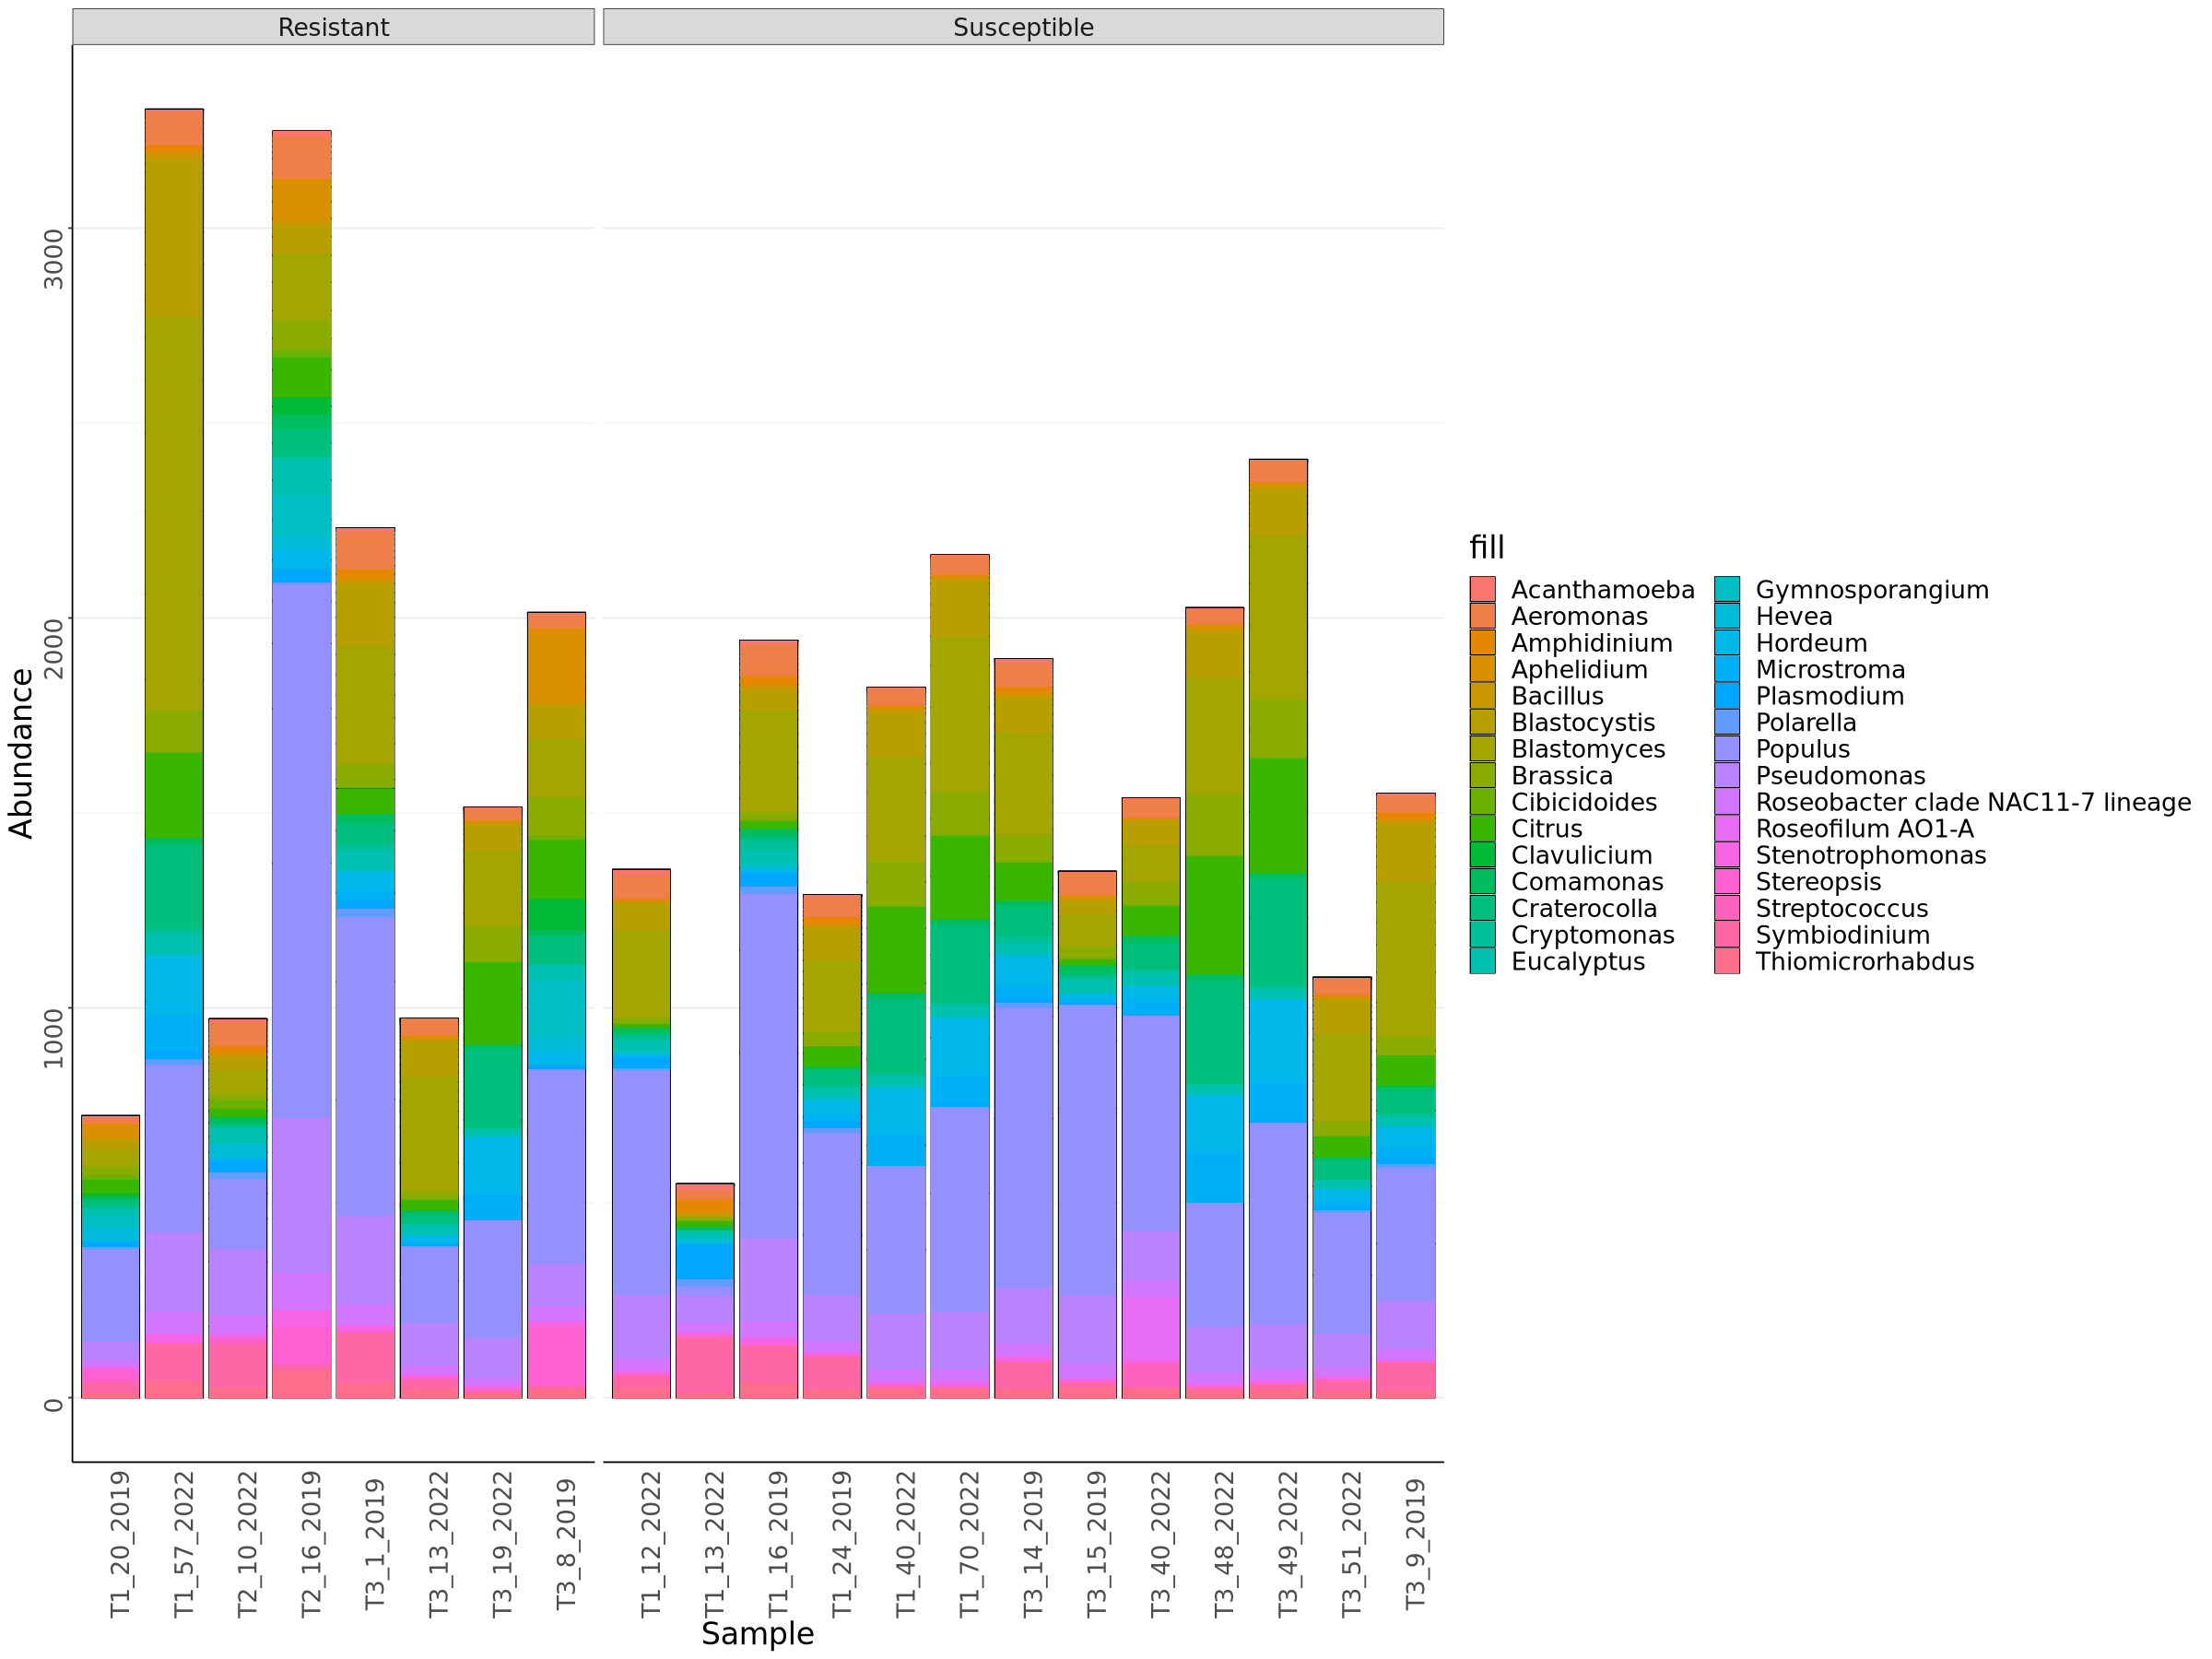

In [135]:
plot_bar(Corals_30)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [136]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/bar_plot.pdf", width = 15, height=10)

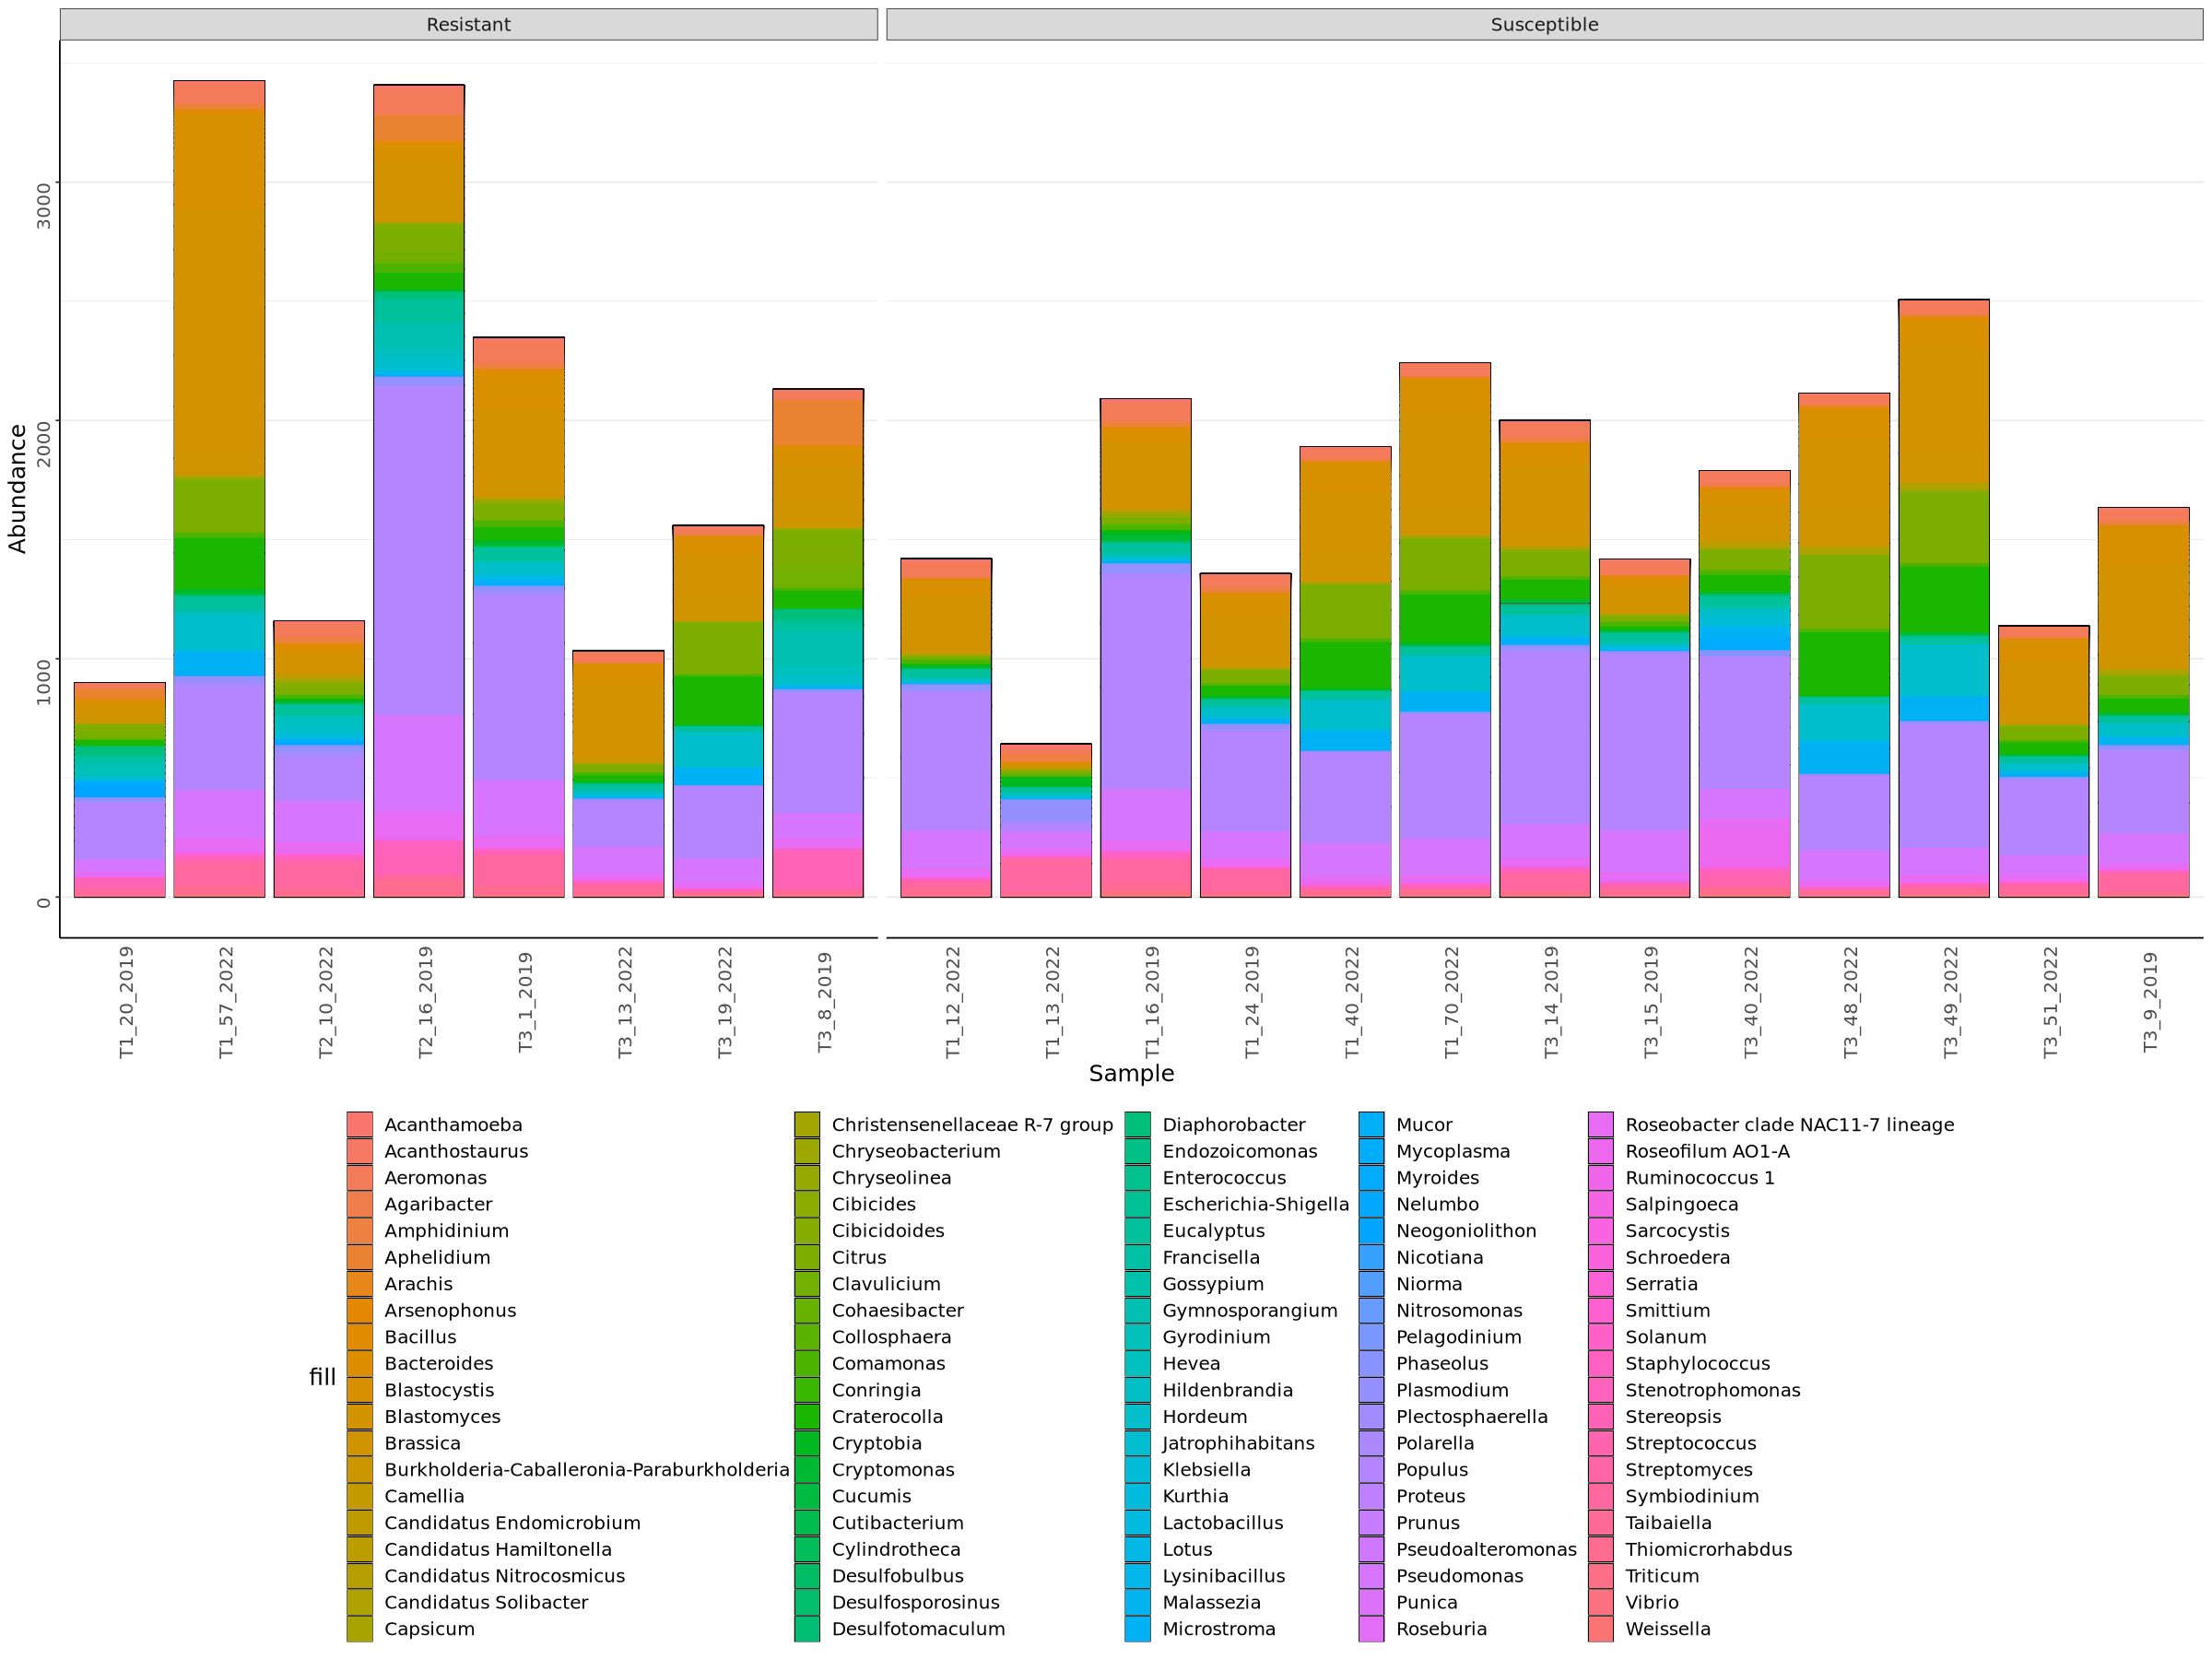

In [145]:
plot_bar(Corals_100)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))

In [146]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/top100_bar_plot.pdf", width = 15, height=10)

In [ ]:
# ^^How do i add color to distinguish OTUs?

In [ ]:
OTU

In [ ]:
tax_table(Corals)

In [137]:
rich=estimate_richness(Corals)
rich

Warning message in estimate_richness(Corals):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': function accepts only integers (counts)


Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


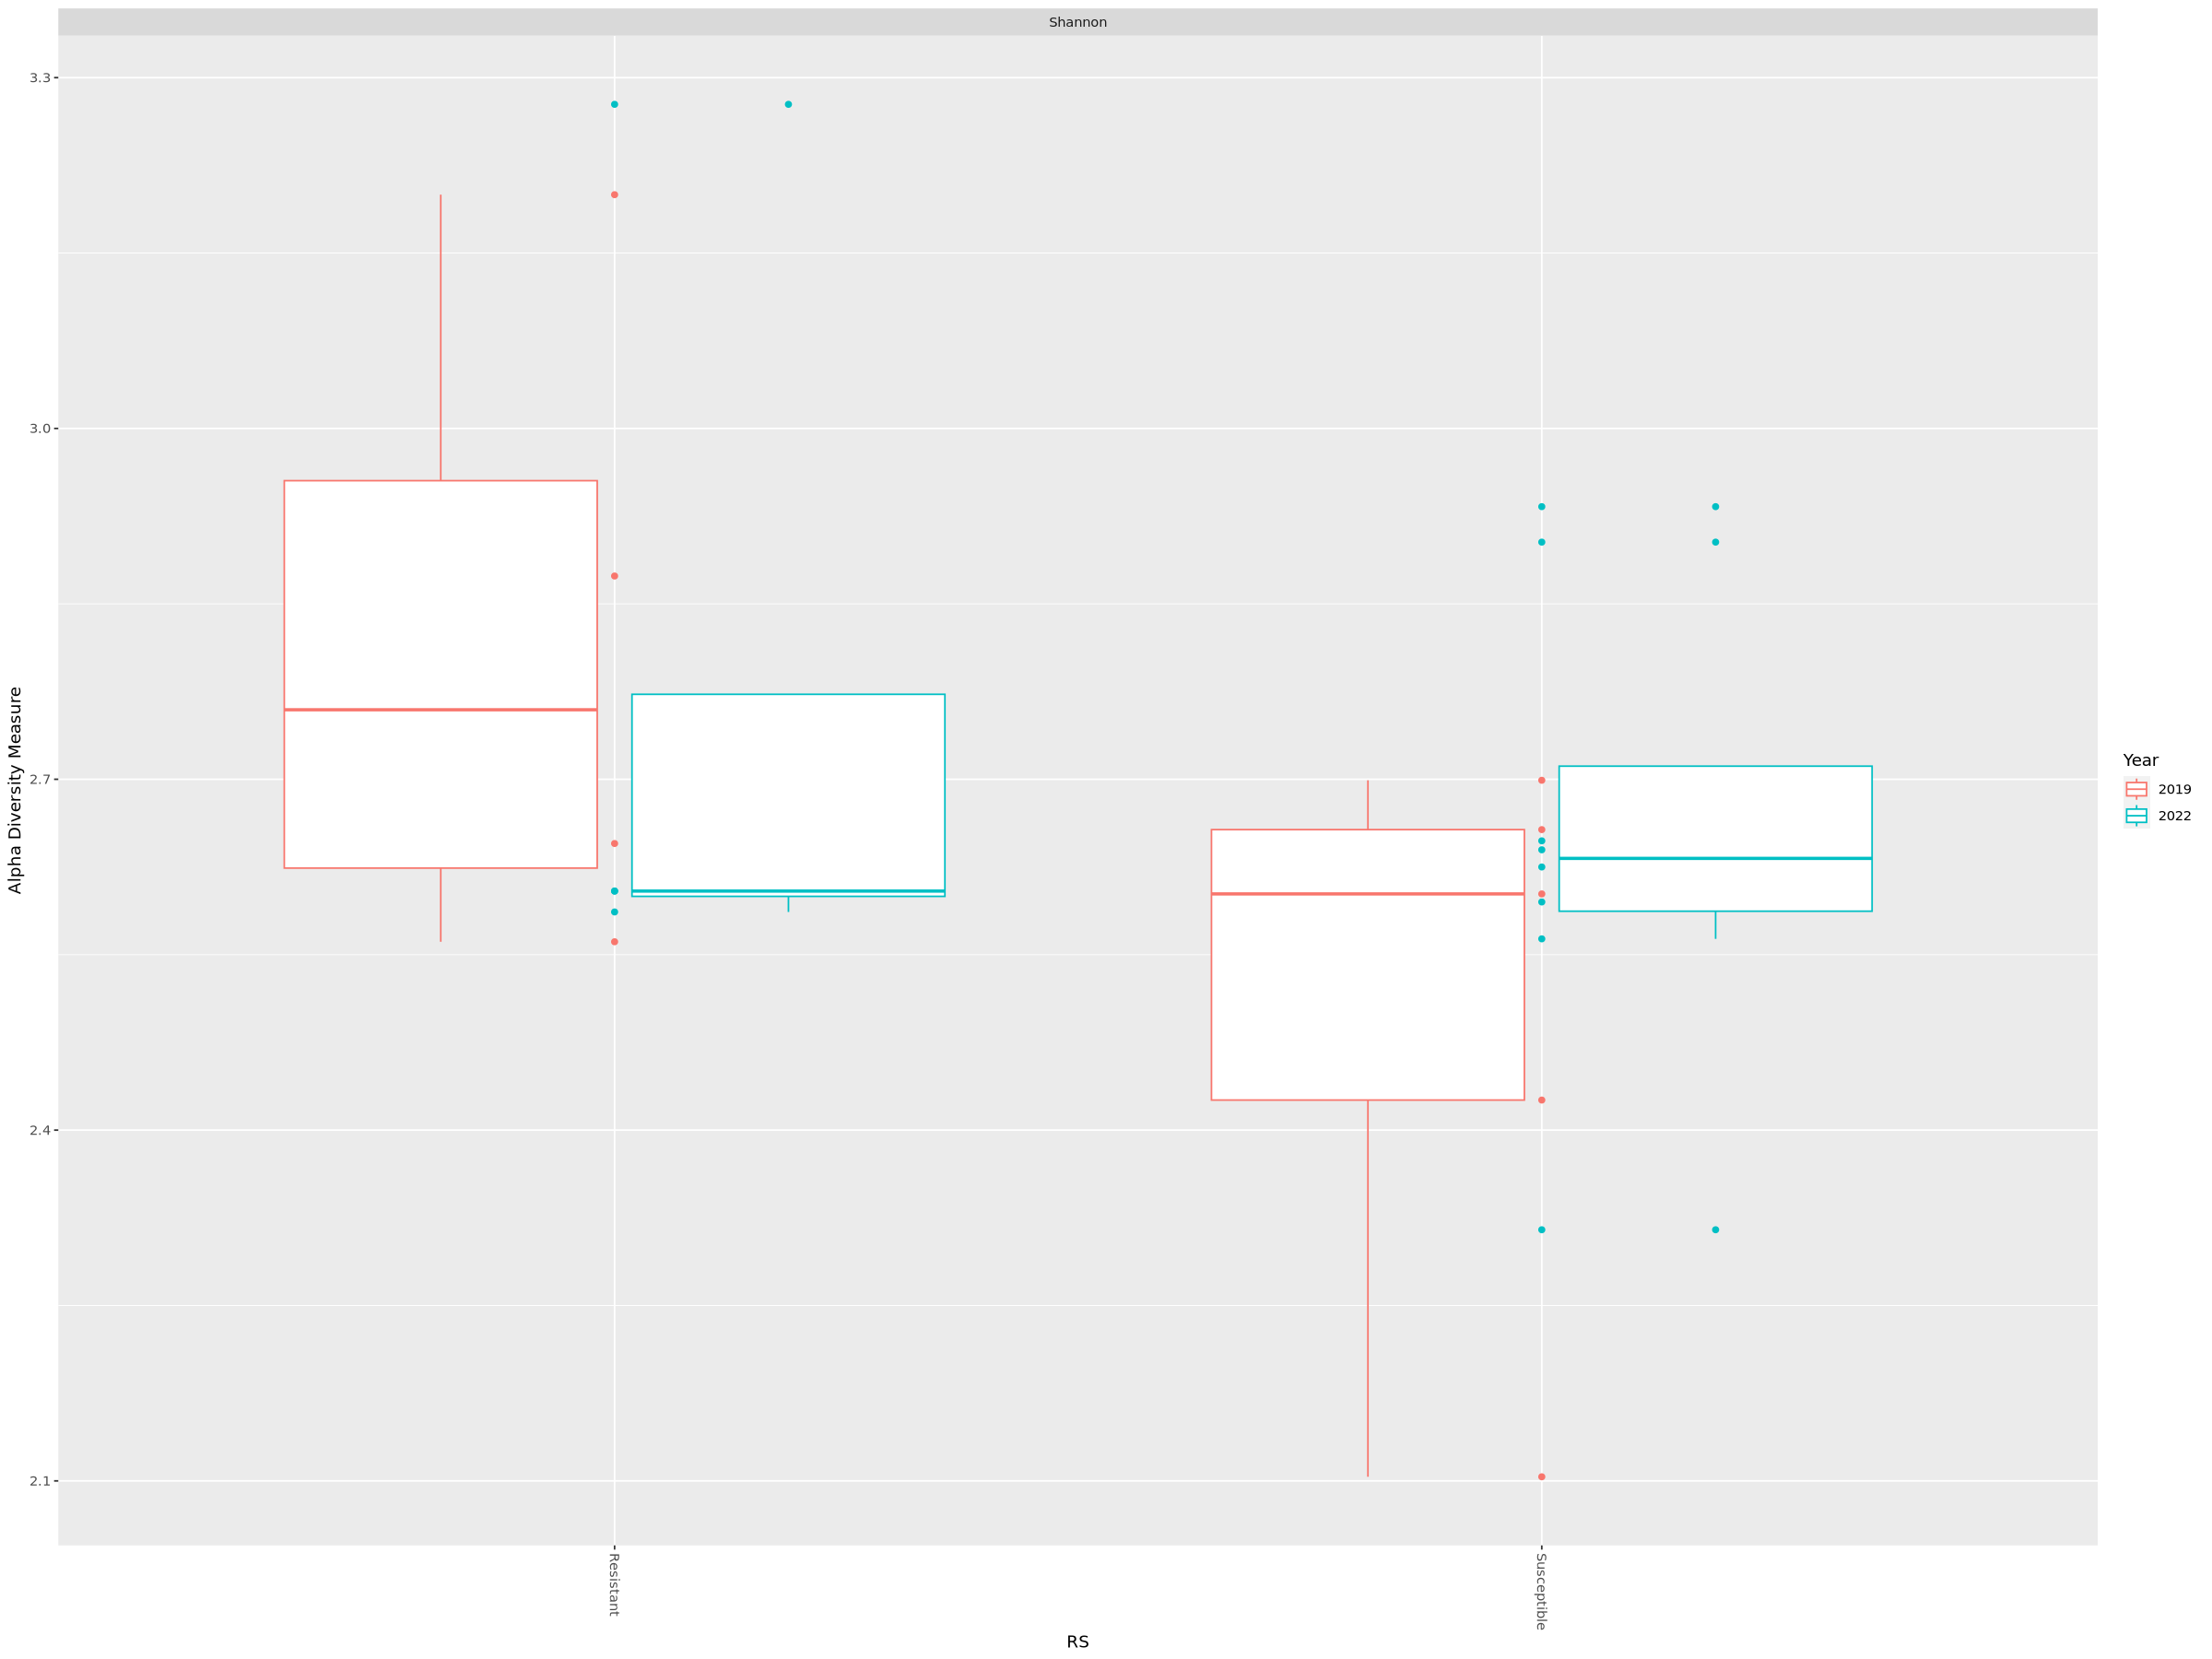

In [138]:

plot_richness(Corals, x="RS", color="Year", measures=c("Shannon")) + geom_boxplot()

In [147]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/shannon_diversity.pdf", width = 15, height=10)

In [139]:
# significance in shannon diversity between R v S
pairwise.wilcox.test(rich$Shannon, sample_data(Corals)$RS)

ERROR: Error in eval(expr, envir, enclos): object 'rich' not found


In [ ]:
# DESEQ
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")


In [ ]:
library("DESeq2")

In [ ]:
sample_data(Corals)$RS <- as.factor(sample_data(Corals)$RS)

In [ ]:
# convert phyloseq to deseq obj 
ds = phyloseq_to_deseq2(Corals, ~ RS)
ds = DESeq(ds)

In [ ]:
# filter otus with a false discovery rate cutoff of 0.01
# return significantly differentially abundant otu b/w R v S
alpha = 0.01
res = results(ds, contrast=c("RS", "Resistant", "Susceptible"), alpha=alpha)
res = res[order(res$padj, na.last=NA), ]
res_sig = res[(res$padj < alpha), ]
res_sig

In [ ]:
# plot significantly different OTUs
res_sig = cbind(as(res_sig, "data.frame"), as(tax_table(Corals)[rownames(res_sig), ], "matrix"))
ggplot(res_sig, aes(x=Genus, y=log2FoldChange, color=Genus)) +
    #geom_jitter(size=3, width = 0.2) +
    theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

In [ ]:
plot_bar(Corals)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(color="Genus", fill="Genus"), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [ ]:
# run plotbar on phyloseq obj

In [ ]:
plot_bar(Corals, fill= "Genus")

In [ ]:
data("GlobalPatterns")
gp.ch = subset_taxa(GlobalPatterns, Phylum == "Chlamydiae")


In [ ]:
plot_bar(Corals)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(color=ta1, fill=ta1), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [ ]:
#Example: 
DE17_100 = prune_taxa(names(sort(taxa_sums(DE17),TRUE)[1:100]), DE17)
plot_bar(DE17_100, fill="Family")+
theme_bw()+
scale_fill_manual(values=mycolors)+
theme(legend.position = "right", text = element_text(size=18), axis.text.x = element_blank())+
facet_grid(.~Site, scales="free_x")

In [ ]:
plot_bar(Corals,  fill="ta1") +
geom_bar(aes(color="ta1", fill="ta1"), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))

In [ ]:
plot_bar(Corals, fill=OTU)+
theme_bw()+
theme(legend.position = "right", text = element_text(size=18), axis.text.x = element_blank())+
facet_grid(.~RS, scales="free_x")

#### Trying something other than phyloseq

In [ ]:
#install.packages("reshape2")
library(ggplot2)
library(reshape2)

In [ ]:
# keep top 100 otus
otus_sorted <- otu_table[1:100, ]
dim(otus_sorted)

In [ ]:
otu_t <- t(otus_sorted)
head(otu_t)

In [ ]:
rownames=rownames(otu_t)
rownames

In [ ]:

pcm = melt(otus_sorted, id=rownames)
pcm

In [ ]:
colnames(pcm)=c("otu","sample","count")

In [ ]:
#make the plot!
mx = ggplot(pcm, aes(x = sample, fill = otu, y = count)) + 
    geom_bar(stat = "identity", colour = "black") + 
    theme(axis.text.x = element_text(angle = 90, size = 14, colour = "black", vjust = 0.5, hjust = 1, face= "bold"), 
    axis.title.y = element_text(size = 16, face = "bold"), legend.title = element_text(size = 16, face = "bold"), 
    legend.text = element_text(size = 12, face = "bold", colour = "black"), 
    axis.text.y = element_text(colour = "black", size = 12, face = "bold")) + 
    scale_y_continuous(expand = c(0,0)) + 
    labs(x = "", y = "Relative Abundance (%)", fill = "OTU") + 
    scale_fill_manual(values = colours)
    
mx

In [ ]:
ggplot(pcm, aes(x = sample, fill = otu, y = count))+ 
    geom_bar(stat = "identity", colour = "black") 